In [1]:
import numpy as np
import matplotlib.pyplot as plt

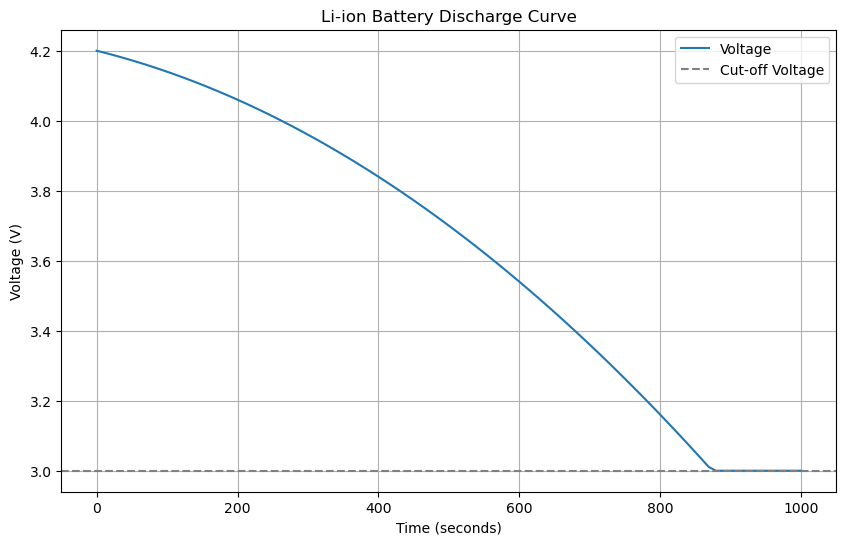

In [ ]:
# Simulation of a Li-ion battery discharge curve

time_sec = np.linspace(0, 1000, 100)    # Time from 0 to 1000 seconds, 100 points

voltage = 4.2 - (0.0005 * time_sec) - (0.000001 * time_sec**2)        # Simulated voltage drop (quadratic for realism)
voltage = np.clip(voltage, 3.0, 4.2)     # Ensure voltage does not drop below 3.0 V

plt.figure(figsize=(10, 6))            # Create a figure with specified size
plt.plot(time_sec, voltage)           # Plot voltage vs. time
plt.xlabel("Time (seconds)")          # Label for x-axis
plt.ylabel("Voltage (V)")             # Label for y-axis
plt.title("Li-ion Battery Discharge Curve")         # Title of the plot
plt.axhline(y=3.0, color='gray', linestyle='--', label="Cut-off Voltage (3.0V)")          # Add cut-off voltage line
plt.grid(True)                        # Add grid for better readability
plt.legend(["Voltage", "Cut-off Voltage"])               # Add legend
plt.show()                            # Display the plot

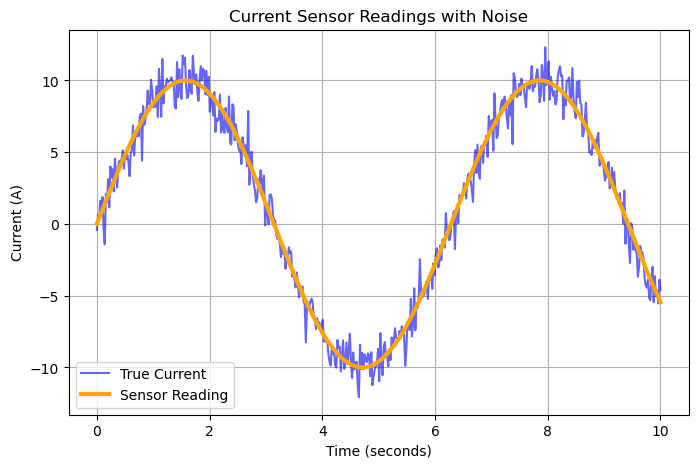

Fault times (seconds): [1.16 1.42 1.52 1.54 1.56 1.7  1.84 7.72 7.9  7.96 8.02]
Number of readings > 11 A: 11


In [7]:
# Simulation of current sensor readings with noise

time_sec=np.linspace(0, 10, 500)        # Time from 0 to 10 seconds, 500 points

# Simulated current with a sinusoidal pattern (0 to 10 A)
current = 10 * np.sin(time_sec)
# Add random noise with mean 0 and standard deviation 1 A
noise = np.random.normal(0, 1, 500)
# Sensor reading is the true current plus noise
sensor_reading = current + noise

# Plotting the current sensor readings with noise
plt.figure(figsize=(8, 5))              # Create a figure with specified size
plt.plot(time_sec, sensor_reading, label="Sensor Reading", color='blue', alpha=0.6)     # Plot sensor readings with noise
plt.plot(time_sec, current, label="True Current", color='orange', linewidth=3)          # Plot the true current without noise
plt.xlabel("Time (seconds)")            # Label for x-axis
plt.ylabel("Current (A)")               # Label for y-axis
plt.title("Current Sensor Readings with Noise")      # Title of the plot
plt.grid(True)                 # Add grid for better readability
plt.legend(["True Current", "Sensor Reading"])       # Add legend
plt.show()              # Display the plot

# Find sensor_reading points greater than 11 A
indices = np.where(sensor_reading > 11)[0]          # Get indices of readings greater than 11 A (0-based)
fault_times = time_sec[indices]                     # Get corresponding times for those readings
count = indices.size                                # Count the number of such readings
print('Fault times (seconds):', np.round(fault_times, 2))        # Print the times when readings are greater than 11 A  
print('Number of readings > 11 A:', count)          # Print the count of readings greater than 11 A